In [86]:
# pip install matplotlib

In [87]:
import pandas as  pd
import matplotlib.pyplot as plt
from config import DB_CONFIG
from sqlalchemy import create_engine
from datetime import datetime
engine = create_engine(f"mysql+mysqlconnector://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{'localhost'}/{DB_CONFIG['database']}")

In [93]:
# merged_sale_user__weather_data=pd.read_csv("/content/drive/MyDrive/aiq/adata.csv")
agregat_sale_user__weather_data= pd.read_sql("""Select * from  agregat_sale_user__weather_data""", con=engine)

In [94]:
agregat_sale_user__weather_data.columns

Index(['index', 'order_id', 'customer_id', 'product_id', 'quantity', 'price',
       'order_date', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'visibility', 'wind_speed', 'wind_deg',
       'cloudiness', 'user_info_table_id', 'id', 'name', 'username', 'email',
       'phone', 'website', 'address.street', 'address.suite', 'address.city',
       'address.zipcode', 'address.geo.lat', 'address.geo.lng', 'company.name',
       'company.catchPhrase', 'company.bs'],
      dtype='object')

In [95]:
agregat_sale_user__weather_data.head(2)

,index,order_id,customer_id,product_id,quantity,price,order_date,weather_id,weather_main,weather_description,...,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs
0,0,2334,5,40,3,35.60,2022-06-21,804,Clouds,overcast clouds,...,demarco.info,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems
1,1,6228,8,13,7,36.52,2023-03-08,800,Clear,clear sky,...,jacynthe.com,Ellsworth Summit,Suite 729,Aliyaview,45169,-14.3990,-120.7677,Abernathy Group,Implemented secondary concept,e-enable extensible e-tailers


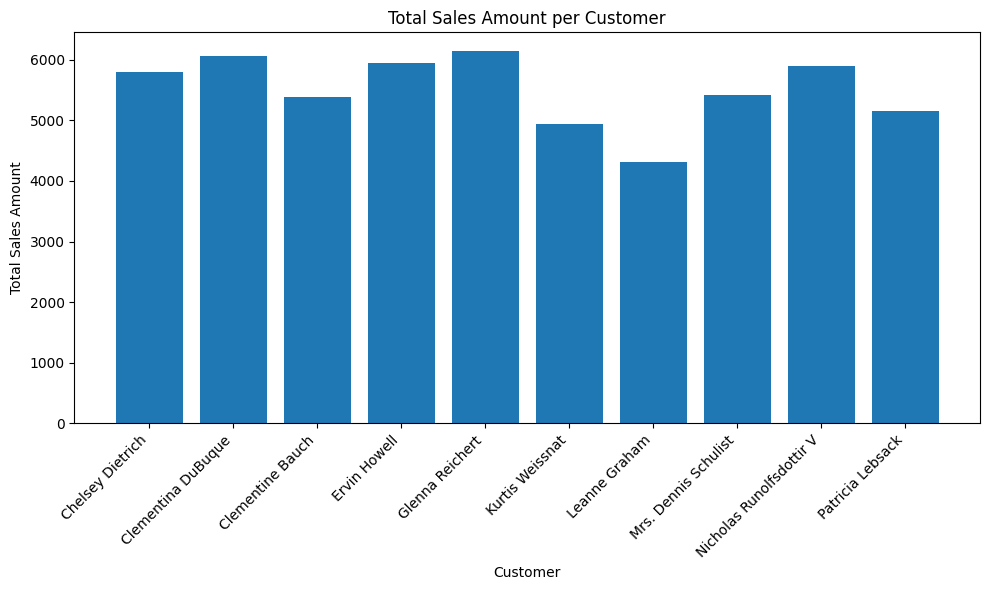

In [96]:
### Calculate total sales amount per customer
results_total_sales_per_customer= pd.read_sql("""select * from results_total_sales_per_customer""", con=engine)
total_sales_per_customer = results_total_sales_per_customer.groupby('name')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_customer['name'], total_sales_per_customer['price'])
plt.xlabel('Customer')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount per Customer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sales amount per customer.png')
plt.show()


In [97]:
# Determine the average order quantity per product
results_average_order_quantity_per_product= pd.read_sql("""select * from results_average_order_quantity_per_product""", con=engine)
average_order_quantity_per_product = results_average_order_quantity_per_product.groupby('product_id')['quantity'].mean().reset_index()
average_order_quantity_per_product.head()

,product_id,quantity
0,1,5.000000
1,2,5.916667
2,3,6.307692
3,4,6.750000
4,5,5.000000


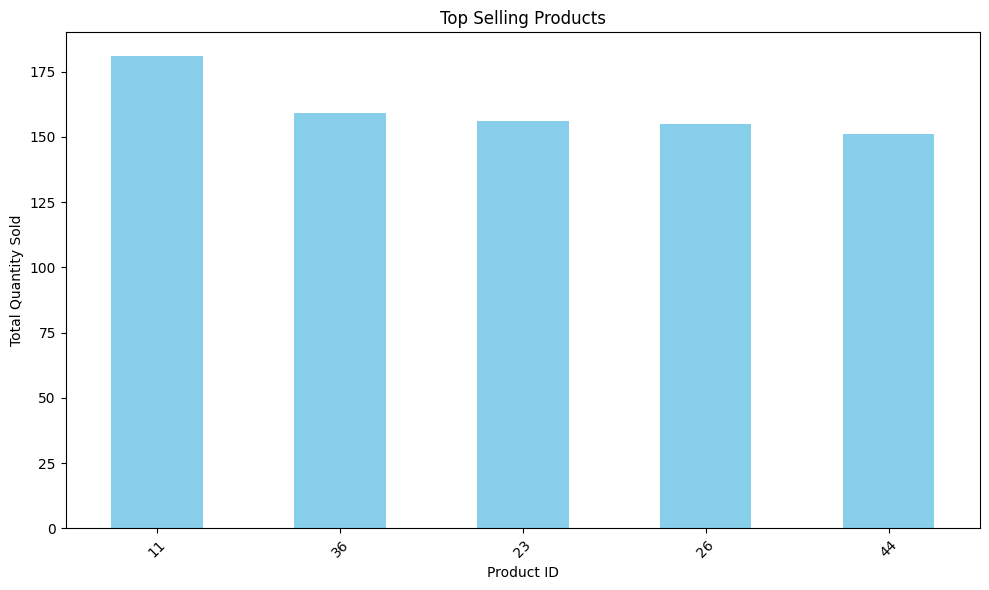

In [98]:
# Identify the top-selling products
results_top_selling_products= pd.read_sql("""select * from results_top_selling_products""", con=engine)
top_selling_products = results_top_selling_products.groupby('product_id')['quantity'].sum().nlargest(5)
# top_selling_products.head()
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top-selling products.png')
plt.show()


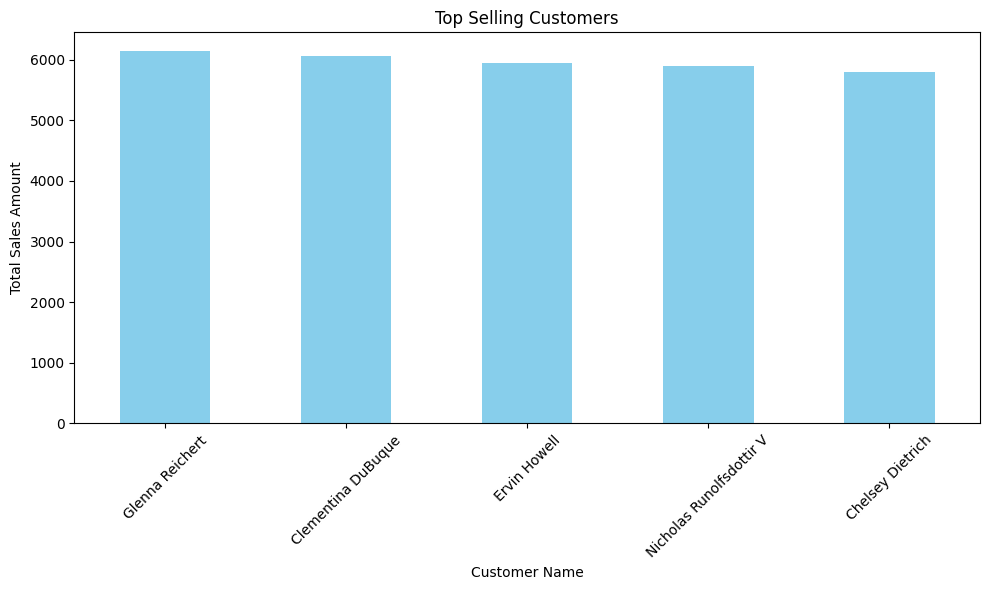

In [99]:
# Identify the top-selling products or customers
results_top_selling_customers= pd.read_sql("""select * from results_top_selling_customers""", con=engine)
top_selling_customers = results_top_selling_customers.groupby('name')['price'].sum().nlargest(5)
# top_selling_customers.head()
plt.figure(figsize=(10, 6))
top_selling_customers.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales Amount')
plt.title('Top Selling Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top-selling products or customers.png')
plt.show()


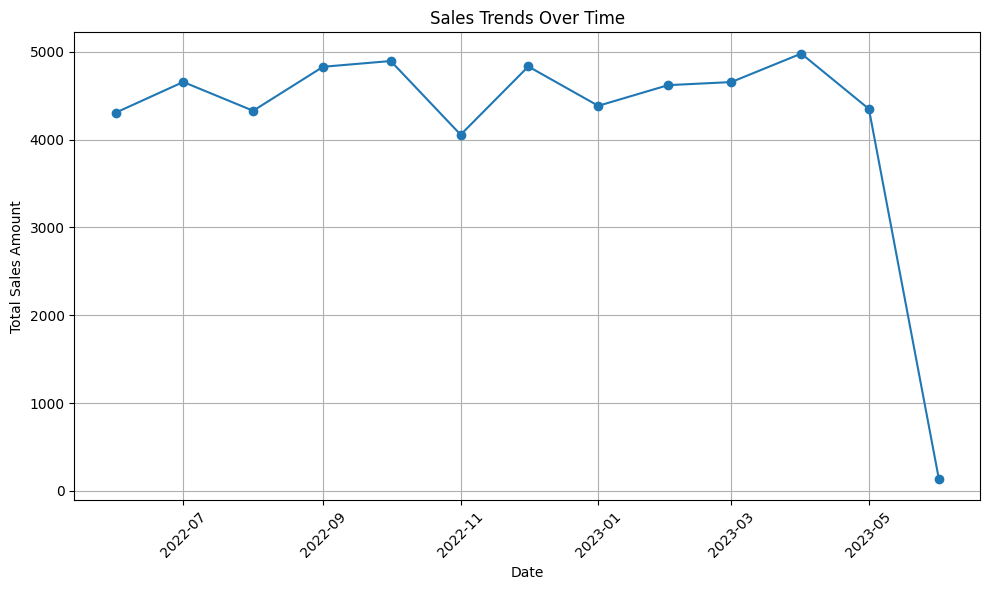

In [100]:
# Analyze sales trends over time monthly
results_sales_trends_over_time= pd.read_sql("""select * from results_sales_trends_over_time""", con=engine)
results_sales_trends_over_time = results_sales_trends_over_time.groupby(results_sales_trends_over_time['order_date'].dt.to_period('M'))['price'].sum()
# sales_trends_over_time.head()
plt.figure(figsize=(10, 6))
plt.plot(results_sales_trends_over_time.index.to_timestamp(), results_sales_trends_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Analyze sales trends over time_monthly.png')
plt.show()



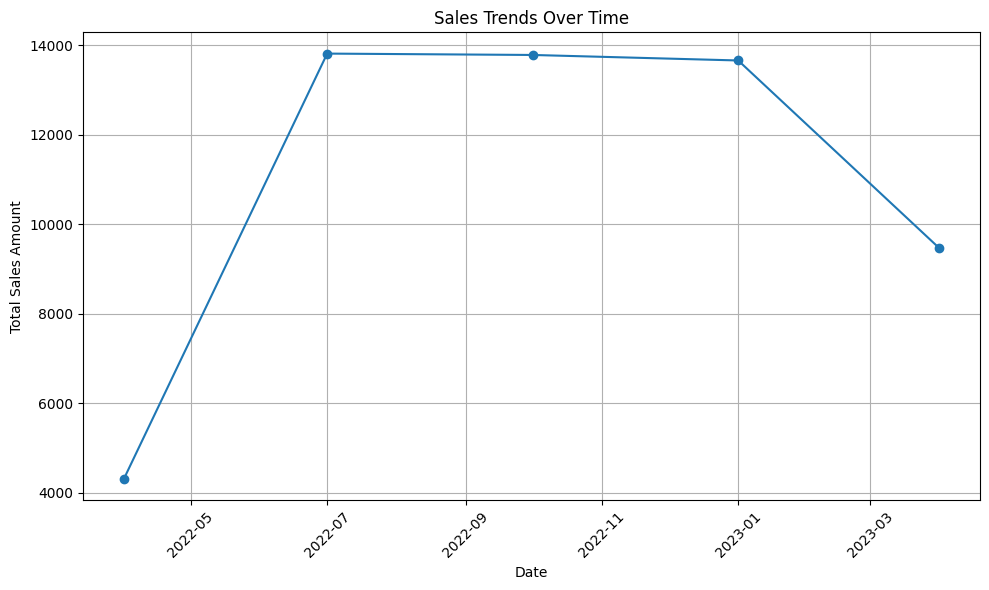

In [101]:
# Analyze sales trends over time Quratly
results_sales_trends_over_time= pd.read_sql("""select * from results_sales_trends_over_time""", con=engine)
results_sales_trends_over_time = results_sales_trends_over_time.groupby(results_sales_trends_over_time['order_date'].dt.to_period('Q'))['price'].sum()
# sales_trends_over_time.head()
plt.figure(figsize=(10, 6))
plt.plot(results_sales_trends_over_time.index.to_timestamp(), results_sales_trends_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Analyze sales trends over time_Quratly.png')
plt.show()

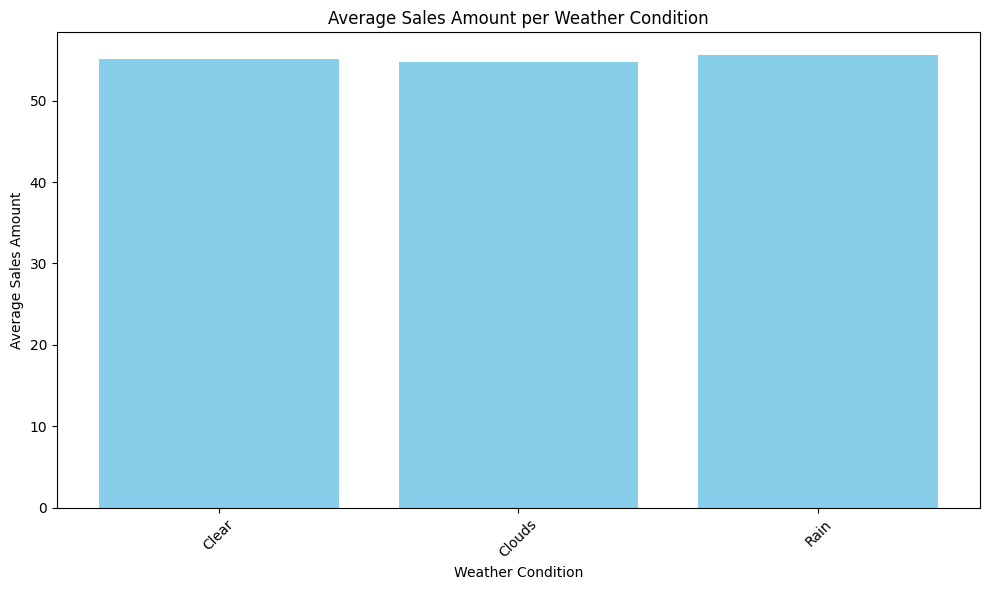

In [102]:
# Calculate average sales amount per weather condition
results_average_sales_per_weather= pd.read_sql("""select * from results_average_sales_per_weather""", con=engine)
results_average_sales_per_weather = results_average_sales_per_weather.groupby('weather_main')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(results_average_sales_per_weather['weather_main'], results_average_sales_per_weather['price'], color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount per Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Calculate average sales amount per weather condition.png')
plt.show()


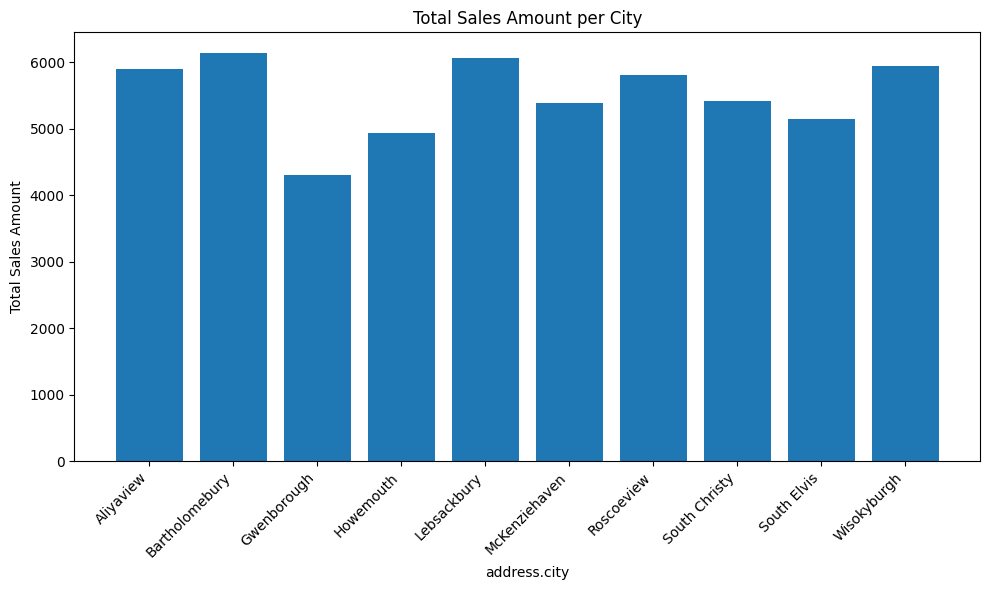

In [103]:
# Calculate total sales amount per address.city
results_total_sales_per_address_city= pd.read_sql("""select * from results_total_sales_per_address_city""", con=engine)
results_total_sales_per_address_city = results_total_sales_per_address_city.groupby('address.city')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(results_total_sales_per_address_city['address.city'], results_total_sales_per_address_city['price'])
plt.xlabel('address.city')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount per City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('total sales amount per addresscity.png')
plt.show()
